In [2]:
import numpy as np
import flies_env as env
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle

/home/epanizon/anaconda3/envs/torch/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## DATA for dynamic plume construction from raw data

In [3]:
import h5py
filename = "2018_09_12_NA_3_3ds_5do_IS_1-frames.mat"
#filename = "2018_09_12_NA_3_3ds_5do_IS_1.mat"
#filename = "ComplexPlumeNavigationPaperData.mat"

f = h5py.File(filename, "r")

print("Keys: %s" % f.keys())

data = f['frames']
print(data)

Keys: <KeysViewHDF5 ['frames']>
<HDF5 dataset "frames": shape (11692, 2048, 1200), type "|u1">


1.2443103849650496
16.0


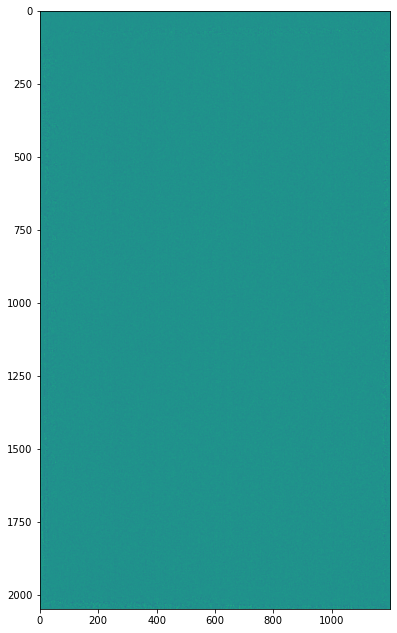

In [4]:
plt.rcParams["figure.figsize"] = (10,11)
plt.imshow(data[600]*1.0-data[0]*1.0)
frame = np.array(data[100]*1.0-data[0]*1.0)
print(np.std(frame))

threshold = np.std(frame)

plt.imshow(frame)
print(np.max(frame))

In [5]:


def boolean_list(data, background, xi, xf, yi, yf, istep, ti, tf, tstep, sigma, threshold):
    # data is a list
    lx, ly = background[xi:xf:istep, yi:yf:istep].shape
    new_data_av = np.zeros((ly, lx))
    tcount = 0
    background = background*1.0
    new_data_b = []
    new_data_n = []
    for tt in np.arange(ti, tf, tstep):
        datashifted = np.array(data[tt])[xi:xf, yi:yf]-background[xi:xf, yi:yf]
        boolean_datashifted =  ( datashifted > threshold)*1
        new_data_b.append(boolean_datashifted[::istep,::istep].T.copy())
        new_data_n.append((datashifted[::istep,::istep].T).astype(int))
        new_data_av += boolean_datashifted[::istep,::istep].T
    return new_data_b, new_data_n, new_data_av / (tf-ti*1.0) * tstep

In [6]:
print(len(data))
plt.imshow(ndimage.gaussian_filter((data[1200]*1.0-data[0]), 15, truncate=2.0)[::20,::20])
print((data[1200]*1.0-data[0]).shape)

11692


NameError: name 'ndimage' is not defined

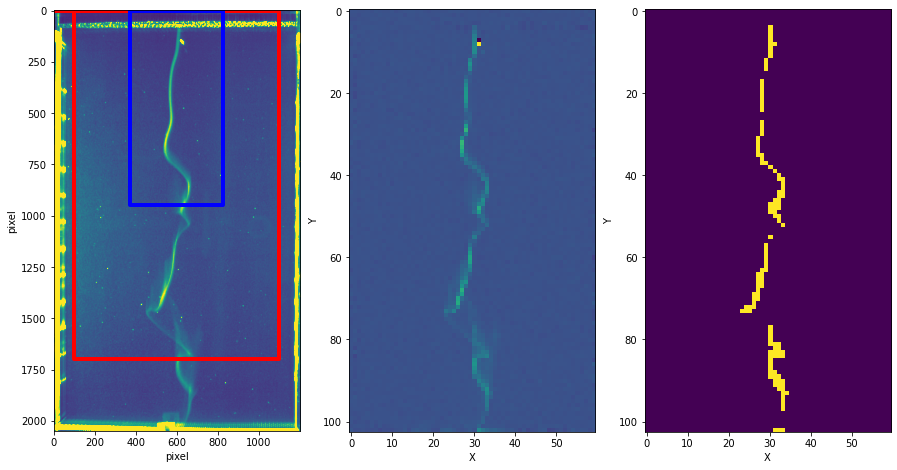

In [20]:
from matplotlib.patches import Rectangle
plt.rcParams["figure.figsize"] = (15,10)

threshold = 5
tstep = 8200
istep = 20
sigma = 1

fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(data[tstep], vmax = 50)
ax1.set_xlabel("pixel")
ax1.set_ylabel("pixel")
ax1.plot([100,100,20*55,20*55,0],[0,20*85,20*85,0,0],lw=4, c='red')
ax1.plot([100+270,100+270,15*55,15*55,100+270],[0,10*95,10*95,0,0],lw=4, c='blue')
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.imshow(ndimage.gaussian_filter(data[tstep]-data[0]*1.0, sigma, truncate=4.0)[::istep,::istep], vmax = 50)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.imshow(((ndimage.gaussian_filter(data[tstep]-data[0]*1.0, sigma, truncate=4.0) > threshold) * 1.0)[::istep,::istep], vmin=0, vmax=1)


In [21]:
# threshold for detection
threshold = 12
# coarse graining size
istep = 10
# time skip
tstep = 2

new_data_bool, new_data_num, new_v = boolean_list(data, data[0], 100, -50, 100, -100, istep, 1500, 5000, tstep, 1, threshold)

In [22]:
len(new_data_bool), len(new_data_num)
import pickle
with open(f"new_data_bool_th{threshold}_istep{istep}_tstep{tstep}_minF{1500}_maxF{5000}.pkl", "wb") as f:
    pickle.dump(new_data_bool, f)
    
    
with open(f"new_data_num_th{threshold}_istep{istep}_tstep{tstep}_minF{1500}_maxF{5000}.pkl", "wb") as f:
    pickle.dump(new_data_num, f)
    
    
with open(f"new_data_av_th{threshold}_istep{istep}_tstep{tstep}_minF{1500}_maxF{5000}.pkl", "wb") as f:
    pickle.dump(new_data_av, f)
    

In [1]:
plt.imshow(new_data_bool[10], vmin=0, vmax=1)
plt.xlabel('Y');
plt.ylabel('X');
plt.title(r'$1/T \sum_t \Theta(c(x,y,t) - c_0)$');
plt.show()
plt.imshow(new_data_num[10][:,:], vmin=0, vmax=4)
plt.xlabel('Y');
plt.ylabel('X');
plt.title(r'$1/T \sum_t (c(x,y,t) - c_0)$');
plt.show()
plt.imshow(new_data_av[:,:], vmin=0, vmax=1)
plt.xlabel('Y');
plt.ylabel('X');
plt.title(r'$1/T \sum_t \Theta(c(x,y,t) - c_0)$');
plt.show()
print(new_data_av)

NameError: name 'plt' is not defined